In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pykonal
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

In [7]:
# Initialize the solver.
solver = pykonal.EikonalSolver(coord_sys="cartesian")
solver.velocity.min_coords = 0, 0, 0
solver.velocity.node_intervals = 0.02, 0.02, 0.02
# This time we want a 3D computational grid, so set the number of grid nodes
# in the z direction to 8 as well.
solver.velocity.npts = 201, 201, 201

field = np.ones(solver.velocity.npts)
field[0:60,20:160,50:100] = 1.5
field[0:80,50:90,110:170] = 0.5
solver.velocity.values = field

# Initialize the source.
src_idx = 0, 0, 0
solver.traveltime.values[src_idx] = 0
solver.unknown[src_idx] = False
solver.trial.push(*src_idx)

# Solve the system.
solver.solve()

1

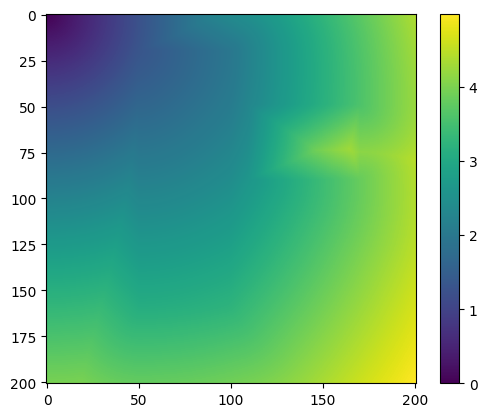

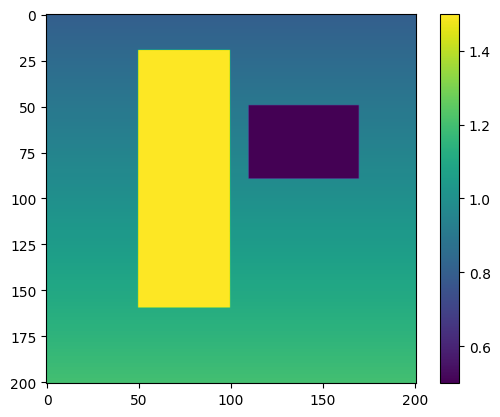

In [8]:
plt.imshow(solver.traveltime.values[0])
plt.colorbar()
plt.show()
plt.imshow(solver.velocity.values[0])
plt.colorbar()
plt.show()

In [5]:
xy = np.array(np.meshgrid(0.02 * np.arange(201), 0.02 * np.arange(201))).reshape(2, -1).T
zs = np.array([solver.traveltime.values[0], solver.velocity.values[0]]).reshape(2, -1).T

In [87]:
np.save('./eikonal_2d.npy', np.array([xy, zs]))

In [15]:
a, b = 25., 1
# a, b = 15., 2

# Initialize the solver.
solver = pykonal.EikonalSolver(coord_sys="cartesian")
solver.velocity.min_coords = 0, 0, 0
solver.velocity.node_intervals = 0.02, 0.02, 0.02
# This time we want a 3D computational grid, so set the number of grid nodes
# in the z direction to 8 as well.
solver.velocity.npts = 201, 201, 201

np.random.seed(42)
field = np.random.randn(*solver.velocity.npts)
field = field[0]
field = gaussian_filter(field, a)
field = 0.1 + 0.8 * (field > 0.)
field = np.tile(field[...,None], 201).T
solver.velocity.values = field

# Initialize the source.
src_idx = 0, 0, 0
solver.traveltime.values[src_idx] = 0
solver.unknown[src_idx] = False
solver.trial.push(*src_idx)

# Solve the system.
solver.solve()

1

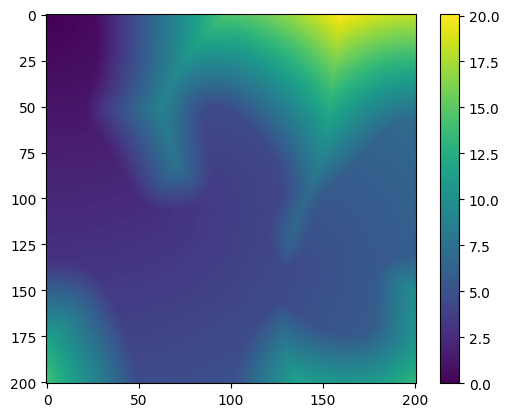

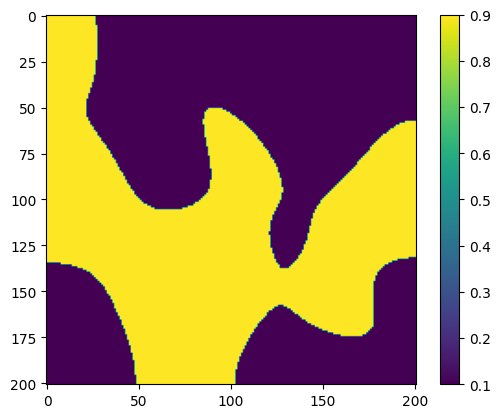

In [16]:
plt.imshow(solver.traveltime.values[0])
plt.colorbar()
plt.show()
plt.imshow(solver.velocity.values[0])
plt.colorbar()
plt.show()

In [17]:
xy = np.array(np.meshgrid(0.02 * np.arange(201), 0.02 * np.arange(201))).reshape(2, -1).T
zs = np.array([solver.traveltime.values[0], solver.velocity.values[0]]).reshape(2, -1).T

In [18]:
np.save(f'./eikonal_2d-{b}.npy', np.array([xy, zs]))

In [26]:
a, b = 25., 1
# a, b = 15., 2

# Initialize the solver.
solver = pykonal.EikonalSolver(coord_sys="cartesian")
solver.velocity.min_coords = 0, 0, 0
solver.velocity.node_intervals = 0.02, 0.02, 0.02
# This time we want a 3D computational grid, so set the number of grid nodes
# in the z direction to 8 as well.
solver.velocity.npts = 201, 201, 201

np.random.seed(42)
field = np.random.randn(*solver.velocity.npts)
field = field[0]
field = gaussian_filter(field, a)
field = 0.1 + 0.8 * (field > 0.)
field = np.tile(field[...,None], 201)
solver.velocity.values = field

# Initialize the source.
src_idx = 0, 0, 0
solver.traveltime.values[src_idx] = 0
solver.unknown[src_idx] = False
solver.trial.push(*src_idx)

# Solve the system.
solver.solve()

1

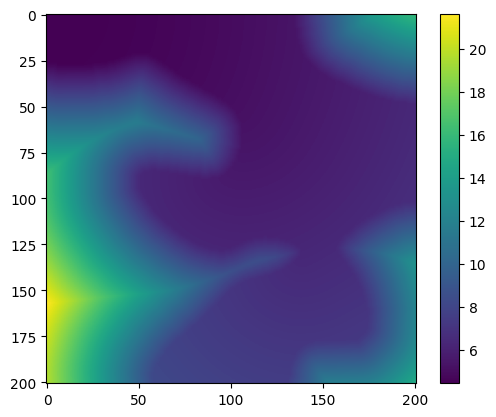

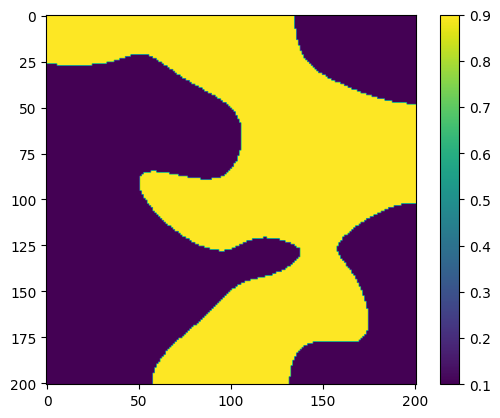

In [32]:
plt.imshow(solver.traveltime.values[:, :, 200])
plt.colorbar()
plt.show()
plt.imshow(solver.velocity.values[:, :, 10])
plt.colorbar()
plt.show()

In [33]:
xy = np.array(np.meshgrid(*[0.02 * np.arange(201) for _ in range(3)])).reshape(3, -1).T
zs = np.array([solver.traveltime.values, solver.velocity.values]).reshape(2, -1).T

In [34]:
np.save('./eikonal_3d.npy', np.concatenate([xy, zs], axis=1))

In [23]:
np.concatenate([xy, zs], axis=1).shape

(8120601, 5)

In [105]:
n = 101

# Initialize the solver.
solver = pykonal.EikonalSolver(coord_sys="cartesian")
solver.velocity.min_coords = 0, 0, 0
solver.velocity.node_intervals = 0.02, 0.02, 0.02
# This time we want a 3D computational grid, so set the number of grid nodes
# in the z direction to 8 as well.
solver.velocity.npts = n, n, n

x, y, z = np.meshgrid(*[0.02 * np.arange(n) for _ in range(3)])
field = 0.8 + 0.1 * x + 0.2 * y - 0.15 * z
field[10:50,10:70,10:50] = 1.5
field[30:70,50:70,30:80] = 0.5
solver.velocity.values = field

# Initialize the source.
src_idx = 0, 0, 0
solver.traveltime.values[src_idx] = 0
solver.unknown[src_idx] = False
solver.trial.push(*src_idx)

# Solve the system.
solver.solve()

1

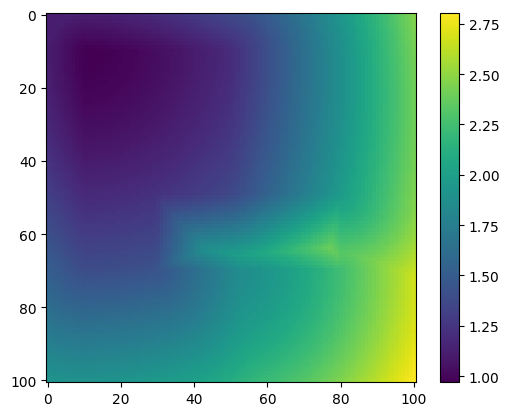

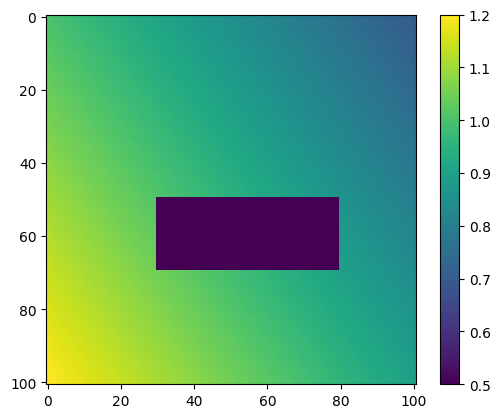

In [110]:
i = 50
plt.imshow(solver.traveltime.values[i])
plt.colorbar()
plt.show()
plt.imshow(solver.velocity.values[i])
plt.colorbar()
plt.show()

In [126]:
xy = np.array([x, y, z]).reshape(3, -1).T
zs = np.array([solver.traveltime.values, solver.velocity.values]).reshape(2, -1).T

In [131]:
np.save('./eikonal_3d.npy', np.concatenate([xy, zs], axis=1))

In [132]:
xy

array([[0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02],
       [0.  , 0.  , 0.04],
       ...,
       [2.  , 2.  , 1.96],
       [2.  , 2.  , 1.98],
       [2.  , 2.  , 2.  ]])